In [10]:
# Importing the required libraries for use of the SVM model
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [11]:
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

Categories = ['Heaven', 'Notheaven']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = 'data'

# Path which contains all the categories of images
for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(datadir, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img_array = imread(img_path)
        
        # Ensure images are RGB and resize to (150, 150)
        if len(img_array.shape) > 2 and img_array.shape[2] == 3:
            img_resized = resize(img_array, (150, 150))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))
        else:
            print(f'Ignoring {img_path} as it is not RGB')
            
print('Images loaded successfully.')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Now you can use flat_data and target arrays for further processing


Loading category: Heaven
Ignoring data\Heaven\christian-dior-spring-summer-2023-paris-fashion-week-maria-grazia-chiuri-runway-017.jpeg as it is not RGB
Ignoring data\Heaven\https __hypebeast.com_image_2022_09_christian-dior-spring-summer-2023-paris-fashion-week-maria-grazia-chiuri-runway-079.jpeg as it is not RGB
Ignoring data\Heaven\Screenshot 2024-04-16 at 10.15.39 AM.png as it is not RGB
Ignoring data\Heaven\Screenshot 2024-04-16 at 10.16.12 AM.png as it is not RGB
Ignoring data\Heaven\Screenshot 2024-04-16 at 10.16.44 AM.png as it is not RGB
Ignoring data\Heaven\Screenshot 2024-04-16 at 10.16.50 AM.png as it is not RGB
Ignoring data\Heaven\Screenshot 2024-04-16 at 10.16.57 AM.png as it is not RGB
Loading category: Notheaven
Ignoring data\Notheaven\classic-suit-clothing-store_398492-13863.jpeg as it is not RGB
Ignoring data\Notheaven\five-kinds-jackets-display-formal-events-such-as-weddings_986511-1124.jpeg as it is not RGB
Ignoring data\Notheaven\image41.png as it is not RGB
Ignori

In [12]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(319, 67501)

In [13]:
# Separation between input + output target
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

In [14]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

In [15]:
# Building + training the model
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [16]:
# Training the model using the training data
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [31]:
# Evaluating the model
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

print(classification_report(y_test, y_pred, target_names=['heaven', 'notheaven']))

The model is 85.9375% accurate
              precision    recall  f1-score   support

      heaven       0.83      0.91      0.87        32
   notheaven       0.90      0.81      0.85        32

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



In [30]:
import pickle

# Assuming 'model' is your trained model object
with open('metgala.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
'''
# load model

import pickle

with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

'''


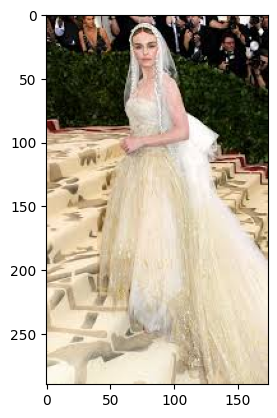

Heaven = 64.48899483002741%
Notheaven = 35.51100516997259%
The predicted image is : Heaven


In [21]:
# Making a prediction
path='data/test_set/heaven/01.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

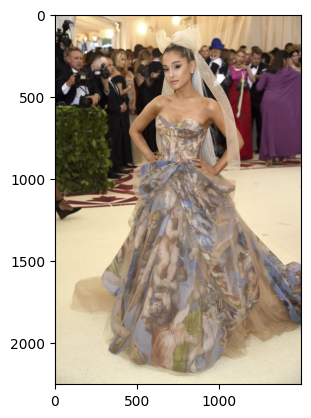

Heaven = 58.393072943729116%
Notheaven = 41.606927056270884%
The predicted image is : Heaven


In [22]:
# Making a prediction
path='data/test_set/heaven/02.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

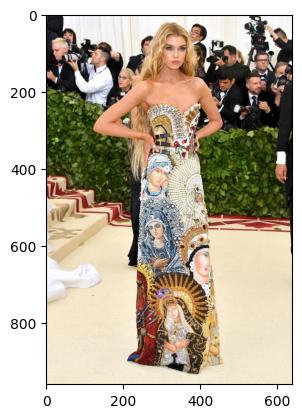

Heaven = 50.0%
Notheaven = 50.0%
The predicted image is : Heaven


In [23]:
# Making a prediction
path='data/test_set/heaven/03.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

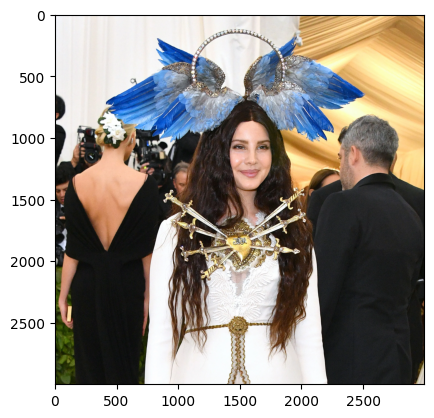

Heaven = 6.736893976829117%
Notheaven = 93.26310602317088%
The predicted image is : Notheaven


In [29]:
# Making a prediction
path='data/test_set/heaven/04.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

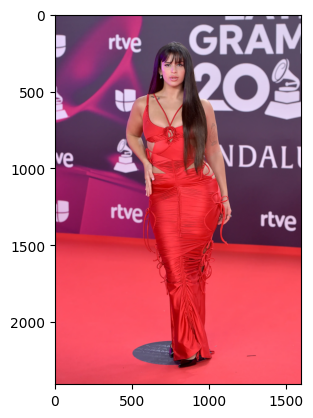

Heaven = 10.33962028178078%
Notheaven = 89.66037971821922%
The predicted image is : Notheaven


In [25]:
# Making a prediction
path='data/test_set/notheaven/02.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

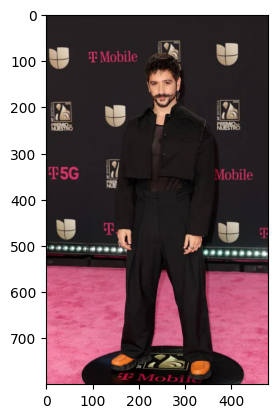

Heaven = 94.17046539173603%
Notheaven = 5.82953460826398%
The predicted image is : Heaven


In [26]:
# Making a prediction
path='data/test_set/notheaven/03.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

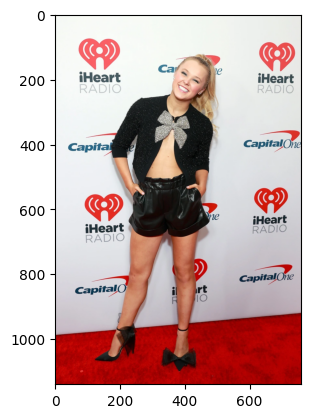

Heaven = 3.802212279929927%
Notheaven = 96.19778772007008%
The predicted image is : Notheaven


In [28]:
# Making a prediction
path='data/test_set/notheaven/04.jpeg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])